# Polytop Library

This Jupyter notebook will demonstrate how to use the Polytop library to load sample ITP files, create monomer instances, and display a 2D representation of molecules.

## Importing the Library

We will import the `polytop` library and confirm the version.

In [51]:
import polytop
from polytop.topology import Topology
from polytop.junction import Junction
from polytop.monomer import Monomer 
from polytop.polymer import Polymer
from polytop.visualize import Visualize
from IPython.display import Image
from IPython.core.display import HTML



## Load topology from an ITP file

First, we will load the ITP files for some molecules to use as monomers.  We'll use some amino acids to make a polypeptide.  We'll start by importing `Arginine` using the `Topology.from_ITP()` function. This function will return a `Topology` object that contains all of the information from the ITP file.  Note for display purposes we'll add a double bond manually between the carbon and the second oxygen in the terminal carboxyl group.

In [52]:
ARG = Topology.from_ITP('tests/data/arginine.itp')
print(ARG.atoms)

[AE97.H26->[AE97.N5], AE97.N5->[AE97.H26,AE97.H25,AE97.C12], AE97.H25->[AE97.N5], AE97.C12->[AE97.N6,AE97.N4,AE97.N5], AE97.N6->[AE97.H24,AE97.C12,AE97.H23], AE97.H23->[AE97.N6], AE97.H24->[AE97.N6], AE97.N4->[AE97.C10,AE97.C12], AE97.C10->[AE97.C8,AE97.N4,AE97.H19,AE97.H18], AE97.H18->[AE97.C10], AE97.H19->[AE97.C10], AE97.C8->[AE97.H15,AE97.C10,AE97.C7,AE97.H16], AE97.H15->[AE97.C8], AE97.H16->[AE97.C8], AE97.C7->[AE97.H14,AE97.H13,AE97.C8,AE97.C9], AE97.H13->[AE97.C7], AE97.H14->[AE97.C7], AE97.C9->[AE97.H17,AE97.C7,AE97.C11,AE97.N3], AE97.H17->[AE97.C9], AE97.N3->[AE97.H20,AE97.H21,AE97.C9], AE97.H20->[AE97.N3], AE97.H21->[AE97.N3], AE97.C11->[AE97.O2,AE97.O1,AE97.C9], AE97.O2->[AE97.C11], AE97.O1->[AE97.C11,AE97.H22], AE97.H22->[AE97.O1]]


We can visualize the topology as a 2D structure to make sure that this is the molecule we want to use.

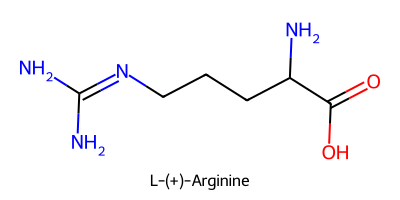

In [53]:
Visualize(ARG).draw2D('tests/output/arginine.png',(400,200))
Image(filename='tests/output/arginine.png') 

Now we need to select the terminal amine and the terminal carboxyl group as polymerization junction points in this topology so we can define this topology as a monomer.  First we redraw the topology with explicit hydrogens visible and atom IDs displayed.

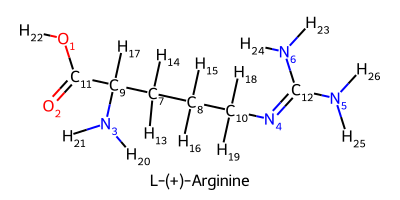

In [54]:
Visualize(ARG).draw2D('tests/output/arginine_unordered.png',(400,200),remove_explicit_H=False, show_atom_ID=True)
Image(filename='tests/output/arginine_unordered.png') 

The first step is to reorder the atom indicies to minimize the name space required for this mononmer (this is not strictly necessary, but it will make the atom IDs easier to read).  We can do this with the `Topology.reorder()` function.  This function will return a new `Topology` object with the atoms reordered.

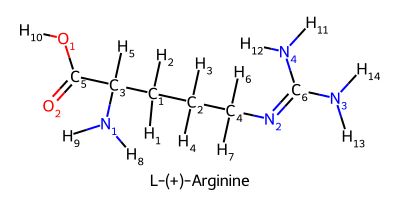

In [55]:
ARG.auto_rename_atoms()
Visualize(ARG).draw2D('tests/output/arginine_ordered.png',(400,200),remove_explicit_H=False, show_atom_ID=True)
Image(filename='tests/output/arginine_ordered.png')

Now we can select the atoms that will be on either side of the polymerization junction points, and give each junction a name.  And finally display the monomer highlighting the junctions.

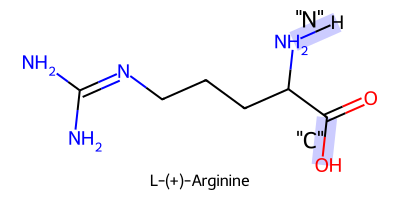

In [56]:

ARG_N = ARG.junction('N1','H9').named('N')
ARG_C = ARG.junction('C5','O1').named('C')
ARG_monomer = Monomer(ARG, [ARG_N, ARG_C])
Visualize.monomer(ARG_monomer).draw2D('tests/output/ARG_monomer.png',(400,200),highlight_junctions=True)
Image(filename='tests/output/ARG_monomer.png')

## Loading a glutamine topology

And we'll do the same with the second amino acid, glutamine

In [57]:
GLN = Topology.from_ITP('tests/data/glutamine.itp')
Visualize(GLN).draw2D('tests/output/GLN.png',(400,200))
Visualize(GLN).draw2D('tests/output/GLN_unordered.png',(400,200),remove_explicit_H=False, show_atom_ID=True)
GLN.auto_rename_atoms() # not required, file already ordered
Visualize(GLN).draw2D('tests/output/GLN_ordered.png',(400,200),remove_explicit_H=False, show_atom_ID=True)
GLN_N = GLN.junction('N1','H6').named('N')
GLN_C = GLN.junction('C4','O1').named('C')
GLN_monomer = Monomer(GLN, [GLN_N, GLN_C])
Visualize.monomer(GLN_monomer).draw2D('tests/output/GLN_monomer.png',(400,200),highlight_junctions=True)


## Glutamine pipeline

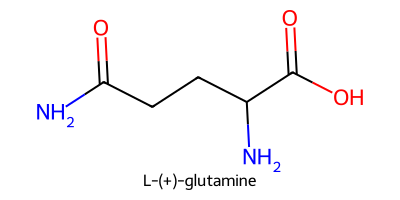

In [58]:
Image(filename="tests/output/GLN.png")

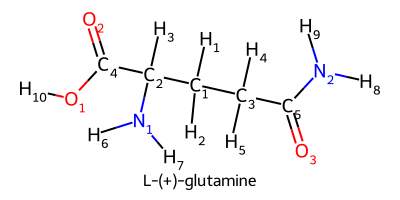

In [59]:
Image(filename="tests/output/GLN_unordered.png")

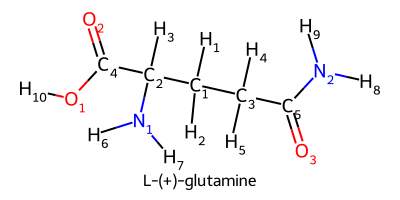

In [60]:
Image(filename="tests/output/GLN_ordered.png")

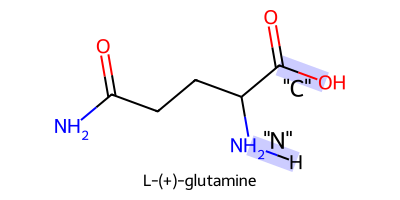

In [61]:
Image(filename='tests/output/GLN_monomer.png')

# Construct a polymer from a set of monomers

 

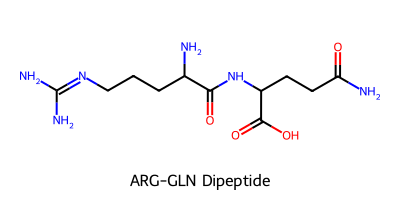

In [62]:
dipeptide = Polymer(ARG_monomer)
dipeptide.extend(GLN_monomer, from_junction_name = "C", to_junction_name = "N")
dipeptide.topology.title = "ARG-GLN Dipeptide"
Visualize.polymer(dipeptide).draw2D('tests/output/dipeptide.png',(400,200))
Image(filename='tests/output/dipeptide.png')

# More complex polymers

We'll model a simple form of glycogen (skipping the glycogenin protein nucleating the **C** chain in the center of the polymer), which is a complex polymer of glucose molecules.  https://chem.libretexts.org/Bookshelves/Biological_Chemistry/Supplemental_Modules_(Biological_Chemistry)/Carbohydrates/Polysaccharides/Glycogen

The structure is characterized by chains 8-10 units long of glucose molecules linked by alpha-1,4-glycosidic bonds, with branches linked by alpha-1,6-glycosidic bonds.  There are three category of chains, **A**, **B**, and **C**, they are 8-10 monomers long, at the end of each chain is a glucose monomer with 3 branch points. There is one **C** chain at the center of the polymer.  For this simplification that **C** chain, will be branch to 2 **B** chains, and each **B** will branch to 4  **A** chains.

### Load monomer - glucose

Note in this topology file;
The C1 glycosidic junction is C₅O₄H₃ 
The C6 glycosidic junction is C₆O₂H₁ 
The C4 glycosidic junction is C₁O₃H₂ 

We'll keep the oxygen in the C4 and C6 glycosidic bond and remove the oxygen in the C1 glycosidic bond so we can construct both 1,4 glycosidic bonds and 1,6 glycosidic bonds.

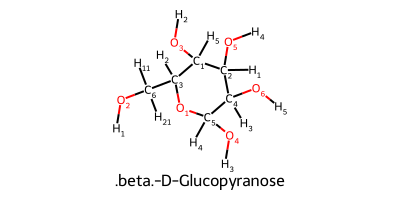

In [63]:
glucose_topology = Topology.from_ITP('tests/data/glucose.itp')
Visualize.topology(glucose_topology).draw2D('tests/output/glucose.png',(400,200), remove_explicit_H=False, show_atom_ID=True)
Image(filename='tests/output/glucose.png')

# Load monomer

Let's start with a simple molecule of glucose, and only one of the isomers (the cyclic form), but it would be possible to model others such as the open chain form as well, and to distribute randomly among multiple given an experimentally derived distribution.  We'll create 3 monomers, one with 1,4 junctions, one with 1,6 junctions, and one with all 3 junctions.  We'll only use the 14 monomers to construct the A chains so there is no chance of a branch from the A chain.  We'll use the 146 monomer to make the B and C chains, but we'll make the B chains first and there should be just 1 1 junction remaining to connect it to the C branch. We'll make the 16 monomer just for completeness (to create other starches like amylase)

In [64]:
glucose_topology = Topology.from_ITP('tests/data/glucose.itp')

alpha1 = glucose_topology.junction('C5','O4').named('1')
alpha6 = glucose_topology.junction('O2','H1').named('6')
alpha4 = glucose_topology.junction('O3','H2').named('4')
glucose_topology.title= "Cyclic glucose monomer"

Glucose_14 = Monomer(glucose_topology, [alpha1, alpha4])
Glucose_16 = Monomer(glucose_topology, [alpha1, alpha6])
Glucose_146 = Monomer(glucose_topology, [alpha1, alpha4, alpha6])

Visualize.monomer(Glucose_14).draw2D('tests/output/glucose_14.png',(400,200),highlight_junctions=True)
Visualize.monomer(Glucose_16).draw2D('tests/output/glucose_16.png',(400,200),highlight_junctions=True)
Visualize.monomer(Glucose_146).draw2D('tests/output/glucose_146.png',(400,200),highlight_junctions=True)


## Glucose monomers

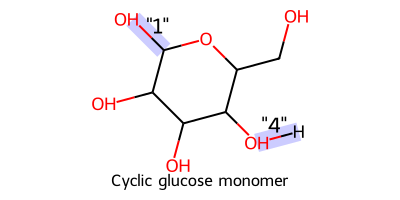

In [65]:
Image(filename='tests/output/glucose_14.png')

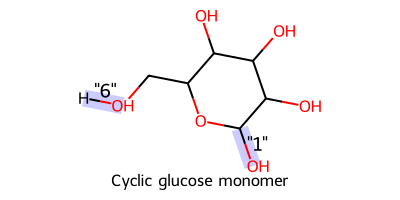

In [66]:
Image(filename='tests/output/glucose_16.png')

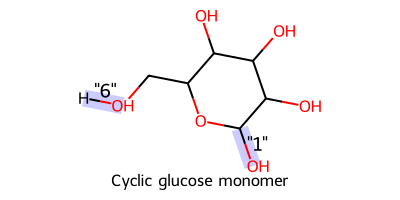

In [67]:
Image(filename='tests/output/glucose_16.png')

# Create A chains

In [68]:
import random
random.seed(42) # for reproducability

def create_14_chain(n):
    A_chain = Polymer(Glucose_14)
    for i in range(n-1):
        A_chain.extend(Glucose_14, from_junction_name = "1", to_junction_name = "4")
    return A_chain

A_chains = []

for i in range(4):
    n = random.randint(8,10)
    chain = create_14_chain(n)
    chain.topology.title = f"Alpha chain of length {n}"
    chain_as_monomer = Monomer.from_Polymer(chain)

    Visualize.monomer(chain_as_monomer).draw2D(f'tests/output/alpha{i}.png',(400,200),highlight_junctions=True)
    A_chains.append(f'tests/output/alpha{i}.png')



Ignoring rdKit error for bond:    33    32     2     0.1181 1.9581e+07
Ignoring rdKit error for bond:    54    53     2     0.1181 8.6600e+06
Ignoring rdKit error for bond:    75    74     2     0.1181 8.6600e+06
Ignoring rdKit error for bond:    96    95     2     0.1181 1.9581e+07
Ignoring rdKit error for bond:   159   158     2     0.1181 8.6600e+06
Ignoring rdKit error for bond:   180   179     2     0.1181 1.9581e+07
Ignoring rdKit error for bond:   189   202     2     0.1181 1.9581e+07


Ignoring rdKit error for bond:    75    74     2     0.1181 1.9581e+07
Ignoring rdKit error for bond:   117   116     2     0.1181 8.6600e+06
Ignoring rdKit error for bond:    33    32     2     0.1181 1.9581e+07
Ignoring rdKit error for bond:    54    53     2     0.1181 8.6600e+06
Ignoring rdKit error for bond:   117   116     2     0.1181 8.6600e+06
Ignoring rdKit error for bond:    54    53     2     0.1181 8.6600e+06
Ignoring rdKit error for bond:    75    74     2     0.1181 8.6600e+06
Ignoring rdKit error for bond:    96    95     2     0.1181 8.6600e+06
Ignoring rdKit error for bond:   117   116     2     0.1181 8.6600e+06
Ignoring rdKit error for bond:   159   158     2     0.1181 8.6600e+06
Ignoring rdKit error for bond:   168   181     2     0.1181 1.9581e+07


## A Chains

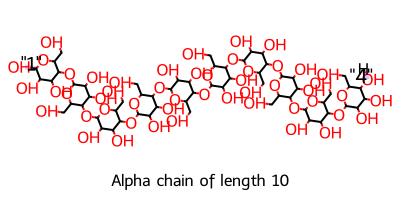

In [69]:
Image(filename='tests/output/alpha0.png')

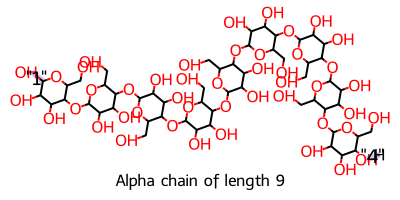

In [70]:
Image(filename='tests/output/alpha1.png')

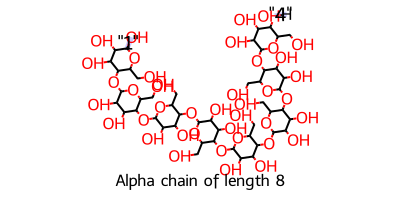

In [71]:
Image(filename='tests/output/alpha2.png')

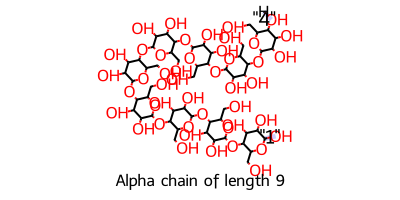

In [72]:
Image(filename='tests/output/alpha3.png')

## Create B Chains

In [73]:
import random

def create_146_chain(n):
    B_chain = Polymer(Glucose_146)
    for i in range(n-1):
        B_chain.extend(Glucose_146, from_junction_name = "1", to_junction_name = "4")
    return B_chain

# Construct 2 B chains with 4 A chains branched from each B chain
B_chains=[]
for i in range(2):
    chain = create_146_chain(random.randint(8,10))
    for j in range(4):
        A_chain = create_14_chain(random.randint(8,10))
        A_chain_as_monomer = Monomer.from_Polymer(A_chain)
        chain.extend(A_chain_as_monomer, from_junction_name = "6", to_junction_name = "1")
    chain.topology.title = f"Beta chain {i}"
    chain_as_monomer = Monomer.from_Polymer(chain)
    B_chains.append(chain_as_monomer)
    Visualize.monomer(chain_as_monomer).draw2D(f'tests/output/beta{i}.png',(400,200),highlight_junctions=True)


Ignoring rdKit error for bond:    92    91     2     0.1181 1.9581e+07
Ignoring rdKit error for bond:   113   112     2     0.1181 1.9581e+07
Ignoring rdKit error for bond:   132   131     2     0.1181 1.9581e+07
Ignoring rdKit error for bond:   153   152     2     0.1181 8.6600e+06
Ignoring rdKit error for bond:   240   239     2     0.1181 8.6600e+06
Ignoring rdKit error for bond:   387   386     2     0.1181 8.6600e+06
Ignoring rdKit error for bond:   408   407     2     0.1181 1.9581e+07
Ignoring rdKit error for bond:   452   451     2     0.1181 1.9581e+07
Ignoring rdKit error for bond:   473   472     2     0.1181 1.9581e+07
Ignoring rdKit error for bond:   620   619     2     0.1181 8.6600e+06
Ignoring rdKit error for bond:   685   684     2     0.1181 1.9581e+07
Ignoring rdKit error for bond:   706   705     2     0.1181 1.9581e+07
Ignoring rdKit error for bond:   748   747     2     0.1181 1.9581e+07
Ignoring rdKit error for bond:   769   768     2     0.1181 8.6600e+06
Ignori

## B Chains

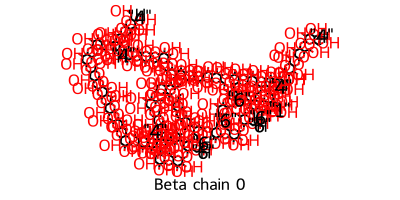

In [74]:
Image(filename='tests/output/beta0.png')

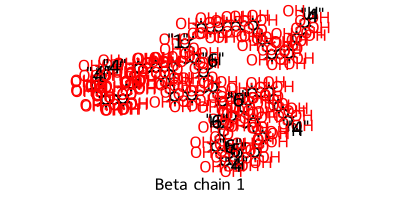

In [75]:
Image(filename='tests/output/beta1.png')

# Create glycogen polymer

In [ ]:
import sys
sys.setrecursionlimit = 250_000 # increase recursion limit to allow for deepcopying large glycogen chains

C_chain = create_146_chain(random.randint(8,10))
C_chain.topology.title = "Glycogen"
Glycogen = C_chain
for monomer in B_chains:
    Glycogen.extend(monomer, from_junction_name = "6", to_junction_name = "1")

Visualize.polymer(Glycogen).draw2D('tests/output/glycogen.png',(400,200))
Image(filename='tests/output/glycogen.png')